In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load and read data
agrodata = pd.read_excel('Copy of Logistics Role Test Data.xlsx')
agrodata.head()

,Agrodealer_id,Date,Agrodealer Referrals,County,Ward
0,473,2021-03-08,0,Siaya,Ukwala
1,473,2021-03-09,0,Siaya,Ukwala
2,473,2021-03-10,0,Siaya,Ukwala
3,473,2021-03-11,1,Siaya,Ukwala
4,473,2021-03-12,0,Siaya,Ukwala


In [3]:
#set Date as index
agrodata.set_index('Date', inplace = True)
agrodata.head()

,Agrodealer_id,Agrodealer Referrals,County,Ward
Date,,,,
2021-03-08,473,0,Siaya,Ukwala
2021-03-09,473,0,Siaya,Ukwala
2021-03-10,473,0,Siaya,Ukwala
2021-03-11,473,1,Siaya,Ukwala
2021-03-12,473,0,Siaya,Ukwala


# QUESTION 1: TOP 10 DEALERS

In [4]:
# Aggregate the data using aggrodealer_id and sum the referrals
top_10_dealers = agrodata.groupby('Agrodealer_id')['Agrodealer Referrals'].sum().reset_index()
top_10_dealers.set_index('Agrodealer_id', inplace = True)
top_10_dealers.head(10)

,Agrodealer Referrals
Agrodealer_id,
473,89
488,145
503,167
518,205
533,81
548,146
563,148
578,201
593,81


In [5]:
#Arrange the data to get the top 10 dealers
top_10_dealers_sorted = top_10_dealers.sort_values(by='Agrodealer Referrals', ascending = False)
top_10_dealers_sorted.head(10)

,Agrodealer Referrals
Agrodealer_id,
698,267
758,253
638,231
518,205
578,201
623,174
503,167
668,164
683,164


In [6]:
#Plot a bar graph for the top 10 dealers
top_10_dealers_sorted['Agrodealer_id'] = top_10_dealers_sorted['Agrodealer_id'].astype(str)
plt.bar(top_10_dealers_sorted['Agrodealer_id'], top_10_dealers_sorted['Agrodealer Referrals'])

plt.xlabel('Agrodealer_id')
plt.ylabel('Agrodealer Referrals')
plt.title('Top 10 Dealers')

plt.show()

KeyError: 'Agrodealer_id'

In [7]:
print(agrodata.columns)

Index(['Agrodealer_id', 'Agrodealer Referrals', 'County', 'Ward'], dtype='object')


In [8]:
print(agrodata.index)

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13'],
              dtype='datetime64[ns]', name='Date', length=2058, freq=None)


In [9]:
agrodata.reset_index(inplace=True)
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward
0,2021-03-08,473,0,Siaya,Ukwala
1,2021-03-09,473,0,Siaya,Ukwala
2,2021-03-10,473,0,Siaya,Ukwala
3,2021-03-11,473,1,Siaya,Ukwala
4,2021-03-12,473,0,Siaya,Ukwala


# QUESTION 2: BEST WEEKS FOR REFERRALS

In [10]:
#convert the days to weeks and add months
agrodata['Date'] = pd.to_datetime(agrodata['Date'])
agrodata['Month'] = pd.to_datetime(agrodata['Date']).dt.month_name()
agrodata['Week'] = agrodata['Date'].dt.isocalendar().week
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week
0,2021-03-08,473,0,Siaya,Ukwala,March,10
1,2021-03-09,473,0,Siaya,Ukwala,March,10
2,2021-03-10,473,0,Siaya,Ukwala,March,10
3,2021-03-11,473,1,Siaya,Ukwala,March,10
4,2021-03-12,473,0,Siaya,Ukwala,March,10


In [11]:
#Aggregate data using weeks and sort values from largest (question2)
best_weeks = agrodata.groupby(['Week']).agg({'Month': 'first', 'Agrodealer Referrals': 'sum'}).reset_index()
best_weeks_sorted = best_weeks.sort_values(by = 'Agrodealer Referrals', ascending = False)
best_weeks_sorted.set_index('Week', inplace = True)
best_weeks_sorted.head(10)

,Month,Agrodealer Referrals
Week,,
17,April,422
16,April,381
18,May,379
15,April,300
14,April,282
19,May,276
20,May,275
13,March,220
21,May,190


# QUESTION 3: BEST DAY OF THE WEEK

In [12]:
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week
0,2021-03-08,473,0,Siaya,Ukwala,March,10
1,2021-03-09,473,0,Siaya,Ukwala,March,10
2,2021-03-10,473,0,Siaya,Ukwala,March,10
3,2021-03-11,473,1,Siaya,Ukwala,March,10
4,2021-03-12,473,0,Siaya,Ukwala,March,10


In [13]:
#The best day for referrals (question3)
best_day = agrodata.sort_values(by='Agrodealer Referrals', ascending = False)
best_day.set_index('Agrodealer_id', inplace=True)
best_day.head(1)

,Date,Agrodealer Referrals,County,Ward,Month,Week
Agrodealer_id,,,,,,
638,2021-04-29,16,Vihiga,Shamakhokho,April,17


# QUESTION 4: TOP AGENTS CONSISTENT BY WEEK AND BY DAY

In [17]:
top_agents_weekly = agrodata.groupby(['Week', 'Agrodealer_id'])['Agrodealer Referrals'].sum().reset_index()
top_agents_weekly = top_agents_weekly.sort_values(by=['Agrodealer Referrals'], ascending=[False])
top_agents_weekly = top_agents_weekly.groupby('Week').head(1)
top_agents_weekly

,Week,Agrodealer_id,Agrodealer Referrals
141,16,698,45
187,18,758,40
162,17,698,39
225,20,698,30
108,15,518,29
99,14,698,29
208,19,758,24
82,13,758,20
242,21,638,18
49,12,578,16


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

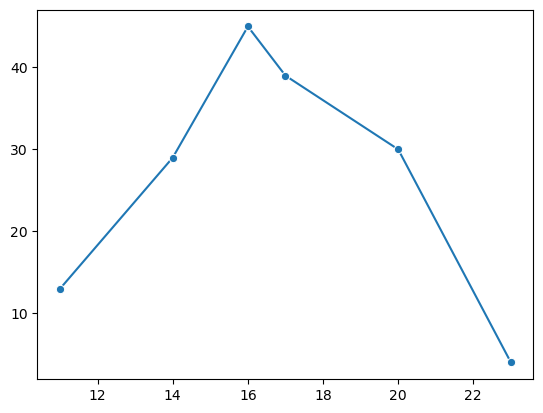

In [29]:
import seaborn as sns

top_agents_weekly['Agrodealer_id'] = top_agents_weekly['Agrodealer_id'].astype(str)

sns.lineplot(x='Week', y='Agrodealer Referrals', hue='Agrodealer_id', data=top_agents_weekly, marker='o')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Agrodealer Referrals')
plt.title('Agrodealer Referrals by Week for Each Agrodealer')

# Show the plot
plt.show()

In [31]:
#converting date to day
agrodata['Day'] = pd.to_datetime(agrodata['Date']).dt.day_name()
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week,Day
0,2021-03-08,473,0,Siaya,Ukwala,March,10,Monday
1,2021-03-09,473,0,Siaya,Ukwala,March,10,Tuesday
2,2021-03-10,473,0,Siaya,Ukwala,March,10,Wednesday
3,2021-03-11,473,1,Siaya,Ukwala,March,10,Thursday
4,2021-03-12,473,0,Siaya,Ukwala,March,10,Friday


In [33]:
top_agents_daily = agrodata.groupby(['Day', 'Agrodealer_id'])['Agrodealer Referrals'].sum().reset_index()
top_agents_daily = top_agents_daily.sort_values(by=['Day', 'Agrodealer Referrals'], ascending=[True, False])
top_agents_daily = top_agents_daily.groupby('Day').head() 
top_agents_daily

,Day,Agrodealer_id,Agrodealer Referrals
11,Friday,638,54
19,Friday,758,54
15,Friday,698,52
3,Friday,518,50
2,Friday,503,44
28,Monday,578,32
36,Monday,698,31
40,Monday,758,24
24,Monday,518,18
32,Monday,638,18
